# <font color = blue>Assignment Part-I</font>

### <font color = brown>Submitted By- </font>
### <font color = red>Bharat M </font>

## Project Brief

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

Also need to determine the optimal value of lambda for ridge and lasso regression.

## Business Goal 

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Step 1 - Reading and Understanding the Data

In [1]:
#Importing all the necessary libraries for our analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [2]:
#Reading from CSV file using pandas
housing=pd.read_csv('train.csv')

In [3]:
#View shape and head of the dataframe
shape=housing.shape
print("Number of rows on the dataset is",shape[0])
print("Number of columns on the dataset is",shape[1])
housing.head()

Number of rows on the dataset is 1460
Number of columns on the dataset is 81


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Check the details of numeric datas
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#View all the column names along with dataype and count of non null values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Step 2 - Data cleaning

In [6]:
#Checking the percentage of null values
null_perc=100*(housing.isnull().sum())/(len(housing.index))

In [7]:
#Considering only null values
null=null_perc>0

In [8]:
#Verifying percentage of null values
null_perc[null]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [9]:
#Replace NA with None 
col=['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical']
for i in col: 
    housing[col]=housing[col].fillna('None')

We observe there are columns having most of the values same throughout the column.

In [10]:
#Dropping columns having most of the values same throughout the column
dropcols=['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond'
          , 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
          , 'PavedDrive', 'PoolQC', 'MiscFeature', 'SaleType']
for i in dropcols:
    housing=housing.drop(i,axis=1)

In [11]:
#Verifying percentage of null values
null_perc=100*(housing.isnull().sum())/(len(housing.index))
null=null_perc>0
null_perc[null]

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

In [12]:
#Verify Column LotFrontage
housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [13]:
#Verify mean of Column LotFrontage
housing['LotFrontage'].mean()

70.04995836802665

In [14]:
#Verify median of Column LotFrontage
housing['LotFrontage'].median()

69.0

In [15]:
#Impute median value for column LotFrontage
housing['LotFrontage']=housing['LotFrontage'].fillna(housing['LotFrontage'].median())

In [16]:
#Verify Column MasVnrArea
housing['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [17]:
#Impute median value for column MasVnrArea
housing['MasVnrArea']=housing['MasVnrArea'].fillna(housing['MasVnrArea'].median())

In [18]:
#Creating columns from date variables
housing['No_of_years_built']=pd.datetime.now().year-housing['YearBuilt']
housing['No_of_years_remod']=pd.datetime.now().year-housing['YearRemodAdd']

Dropping columns which we have used for deriving variables and not neccessary for our analysis.

Columns- [YearBuilt,YearRemodAdd,YrSold,GarageYrBlt,BsmtFinSF2,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,EnclosedPorch,3SsnPorch,
 ScreenPorch,PoolArea',MiscVal]

In [19]:
#Dropping columns which is not useful for our analysis 
dropcols=['YearBuilt', 'MoSold','YearRemodAdd', 'YrSold', 'GarageYrBlt','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']
for i in dropcols:
    housing=housing.drop(i,axis=1)

In [20]:
#Shape of dataset
housing.shape

(1460, 48)

In [21]:
# check for percentage of null values after imputing and droping values for all the columns
null_perc = round(100*(housing.isnull().sum()/len(housing.index)), 2)
print(null_perc)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


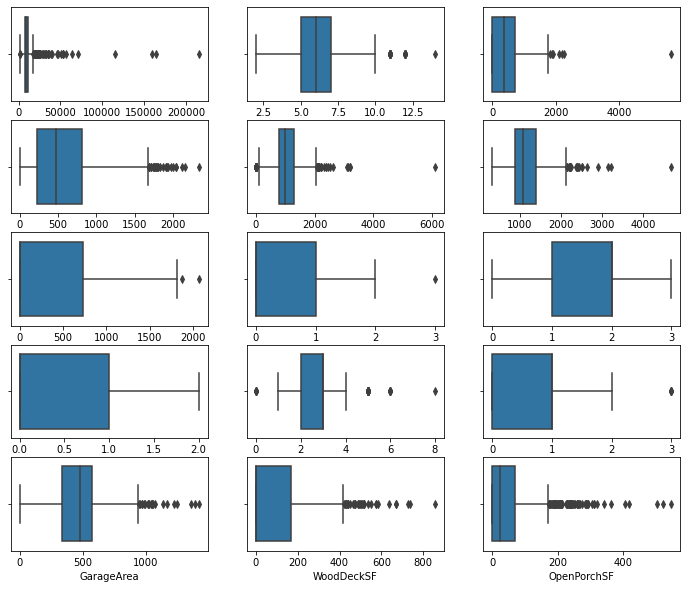

In [22]:
# Checking outliers 
plt.figure(figsize=(12,10))
plt.subplot(5,3,1)
sns.boxplot(housing['LotArea'])
plt.subplot(5,3,2)
sns.boxplot(housing['TotRmsAbvGrd'])
plt.subplot(5,3,3)
sns.boxplot(housing['BsmtFinSF1'])
plt.subplot(5,3,4)
sns.boxplot(housing['BsmtUnfSF'])
plt.subplot(5,3,5)
sns.boxplot(housing['TotalBsmtSF'])
plt.subplot(5,3,6)
sns.boxplot(housing['1stFlrSF'])
plt.subplot(5,3,7)
sns.boxplot(housing['2ndFlrSF'])
plt.subplot(5,3,8)
sns.boxplot(housing['BsmtFullBath'])
plt.subplot(5,3,9)
sns.boxplot(housing['FullBath'])
plt.subplot(5,3,10)
sns.boxplot(housing['HalfBath'])
plt.subplot(5,3,11)
sns.boxplot(housing['BedroomAbvGr'])
plt.subplot(5,3,12)
sns.boxplot(housing['Fireplaces'])
plt.subplot(5,3,13)
sns.boxplot(housing['GarageArea'])
plt.subplot(5,3,14)
sns.boxplot(housing['WoodDeckSF'])
plt.subplot(5,3,15)
sns.boxplot(housing['OpenPorchSF'])
plt.show()

In [23]:
#Checking outliers
out_col=['LotArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath'
   , 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']
for i in out_col:
    print(i)
    print(housing[i].describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.9,.92,.94,.96,.98,.99,1]))
    print()

LotArea
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
10%        5000.000000
20%        7078.400000
30%        8063.700000
40%        8793.400000
50%        9478.500000
60%       10198.200000
70%       11066.500000
90%       14381.700000
92%       15427.400000
94%       16551.900000
96%       18857.600000
98%       25251.620000
99%       37567.640000
100%     215245.000000
max      215245.000000
Name: LotArea, dtype: float64

BsmtFinSF1
count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%       218.600000
50%       383.500000
60%       525.600000
70%       655.000000
90%      1065.500000
92%      1154.840000
94%      1225.060000
96%      1309.000000
98%      1442.640000
99%      1572.410000
100%     5644.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

BsmtUnfSF
count    1460.000000
mean      567.240411
std       441.866955
min    

In [24]:
#Removing outliers
outlier=housing['LotArea'].quantile(0.98)
housing=housing[housing["LotArea"]<outlier]

outlier=housing['BsmtFinSF1'].quantile(0.98)
housing=housing[housing["BsmtFinSF1"]<outlier]

outlier=housing['BsmtUnfSF'].quantile(0.98)
housing=housing[housing["BsmtUnfSF"]<outlier]

outlier=housing['TotalBsmtSF'].quantile(0.99)
housing=housing[housing["TotalBsmtSF"]<outlier]

outlier=housing['WoodDeckSF'].quantile(0.99)
housing=housing[housing["WoodDeckSF"]<outlier]

outlier=housing['OpenPorchSF'].quantile(0.99)
housing=housing[housing["OpenPorchSF"]<outlier]

In [25]:
# Determine the percentage of data remaining
Data_remaining=round(100*(len(housing)/1460),2)
print(Data_remaining)

91.1


## Step 2 - Data Preparation

<AxesSubplot:>

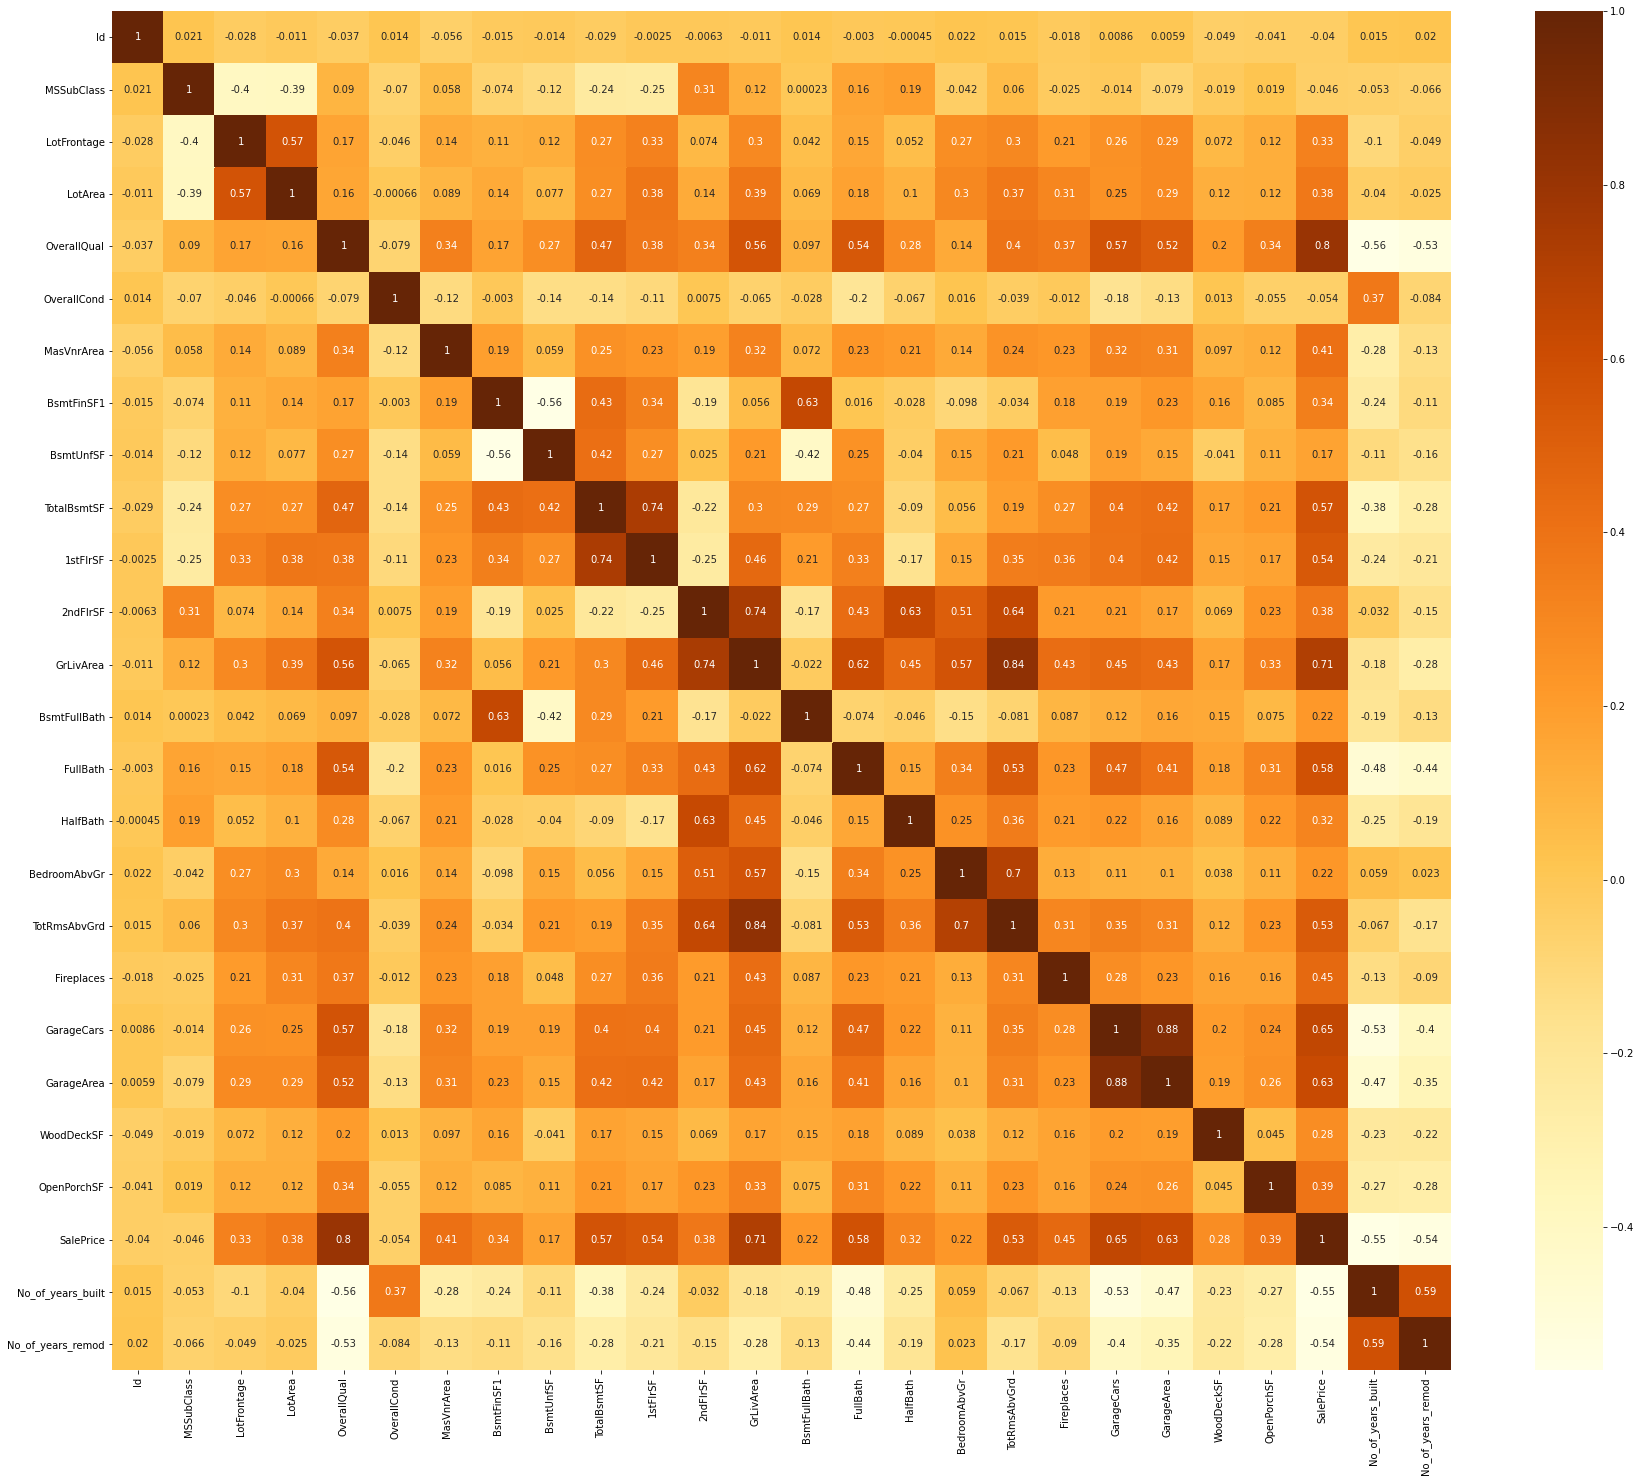

In [26]:
#Viewing correlation
plt.figure(figsize=(30,25))
sns.heatmap(housing.corr(),annot=True,cmap="YlOrBr")

Highly correlated
- TotRmsAbvGrd and GrLivArea - 84%
- Garage Area and Garage Cars - 88%

In [27]:
#Dropping columns which are higly correlated
dropcols=['TotRmsAbvGrd', 'GarageArea']
for i in dropcols:
    housing=housing.drop(i,axis=1)

Identified ordered categorical columns 

Columns - [LotShape,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,BldgType,HouseStyle,LotConfig
,MasVnrType,SaleCondition]

In [28]:
#Assigning numeric values to order categorical volumns 
housing['new_FireplaceQu']=housing['FireplaceQu'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['new_HeatingQC']=housing['HeatingQC'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['new_KitchenQual']=housing['KitchenQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['new_BsmtQual']=housing['BsmtQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['new_ExterQual']=housing['ExterQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['new_BsmtExposure']=housing['BsmtExposure'].map({'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing['new_LotShape']=housing['LotShape'].map({'IR3':0,'IR2':1,'IR1':2,'Reg':3})
housing['new_GarageFinish']=housing['GarageFinish'].map({'None':0,'Unf':1,'RFn':2,'Fin':3})
housing['new_HouseStyle']=housing['HouseStyle'].map({'None':0,'1Story':1,'1.5Unf':2,'1.5Fin':3,'2Story':4,'2.5Unf':5
                                                             ,'2.5Fin':6,'SFoyer':7,'SLvl':8})
housing['new_BsmtFinType1']=housing['BsmtFinType1'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing['new_SaleCondition']=housing['SaleCondition'].map({'None':0,'Abnorml':0,'Family':0,'Alloca':0,'AdjLand':0,
                                                                   'Normal':1,'Partial':1})
housing['new_MasVnrType']=housing['MasVnrType'].map({'None':0,'BrkFace':1,'BrkCmn':1,'Stone':1,'CBlock':1})
housing['new_BldgType']=housing['BldgType'].map({'Twnhs':5,'TwnhsE':4,'Duplex':3,'2fmCon':2,'1Fam':1,'None':0})
housing['new_Fence'] = housing['Fence'].map({'None':0 ,'MnWw':1,'MnPrv':2,'GdWo':3,'GdPrv':4})
housing['new_LotConfig']=housing['LotConfig'].map({'Inside':5,'Corner':4,'CulDSac':3,'FR2':2,'FR3':1,'None':0})

In [29]:
#Dropping columns form which we have already created dummy variables
dropcols=['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
        'LotConfig', 'MasVnrType', 'SaleCondition']
for i in dropcols:
    housing=housing.drop(i,axis=1)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,new_BsmtExposure,new_LotShape,new_GarageFinish,new_HouseStyle,new_BsmtFinType1,new_SaleCondition,new_MasVnrType,new_BldgType,new_Fence,new_LotConfig
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,3,2,4,6,1,1,1,0,5
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,4,3,2,1,5,1,0,1,0,2
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,2,2,2,4,6,1,1,1,0,5
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,1,2,1,4,5,0,0,1,0,4
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,3,2,2,4,6,1,1,1,0,2


In [30]:
#Creating dummy variables
new_MSZoning = pd.get_dummies(housing['MSZoning'], prefix='MSZoning', drop_first = True)
housing = pd.concat([housing, new_MSZoning], axis = 1)
new_Neighborhood = pd.get_dummies(housing['Neighborhood'], prefix='Neighborhood', drop_first = True)
housing = pd.concat([housing, new_Neighborhood], axis = 1)
new_RoofStyle = pd.get_dummies(housing['RoofStyle'], prefix='RoofStyle', drop_first = True)
housing = pd.concat([housing, new_RoofStyle], axis = 1)
new_Exterior1st = pd.get_dummies(housing['Exterior1st'], prefix='Exterior1st', drop_first = True)
housing = pd.concat([housing, new_Exterior1st], axis = 1)
new_Exterior2nd = pd.get_dummies(housing['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
housing = pd.concat([housing, new_Exterior2nd], axis = 1)
new_Foundation = pd.get_dummies(housing['Foundation'], prefix='Foundation', drop_first = True)
housing = pd.concat([housing, new_Foundation], axis = 1)
new_GarageType = pd.get_dummies(housing['GarageType'], prefix='GarageType', drop_first = True)
housing = pd.concat([housing, new_GarageType], axis = 1)

In [31]:
#Dropping columns from which we created dummy variables
housing = housing.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

In [32]:
#View dataset information
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1330 entries, 0 to 1458
Columns: 110 entries, MSSubClass to GarageType_None
dtypes: float64(2), int64(36), uint8(72)
memory usage: 498.8 KB


In [33]:
#Split X & y
X=housing.drop(['SalePrice'], axis=1)
y=np.log(housing['SalePrice'])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=101)

In [35]:
#Impute missing value after splitting train and test dataset 
simp_imp = SimpleImputer(missing_values=np.nan, strategy='mean')

### Feature Scaling

In [36]:
#Perform scaling
scaler= StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [37]:
#Scaling X_train & X_test
scaled_X_train=pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns)
scaled_X_test=pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns)

### Perform RFE

In [38]:
#Function to return top n columns
def top_n_func(n):
    top_n_cols=[] 
    lr=LinearRegression()
    lr.fit(scaled_X_train, y_train)
    rfe = RFE(lr, n)
    rfe = rfe.fit(scaled_X_train, y_train) 
    print("Top %d Columns:" %n)
    rank=list(zip(scaled_X_train.columns,rfe.support_,rfe.ranking_))   
    for i in rank:
        if i[1]:
            top_n_cols.append(i[0])
    print()
    print(top_n_cols)
    print()
    return top_n_cols

In [39]:
# Checking top 45, 50 and 55 features
top_30 = top_n_func(30)
top_40 = top_n_func(40)
top_50 = top_n_func(50)

Top 30 Columns:

['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageCars', 'No_of_years_built', 'new_FireplaceQu', 'new_HeatingQC', 'new_KitchenQual', 'new_BsmtExposure', 'new_BsmtFinType1', 'new_SaleCondition', 'new_BldgType', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Exterior1st_Wd Sdng', 'Exterior2nd_Wd Sdng', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd']

Top 40 Columns:

['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'GarageCars', 'No_of_years_built', 'No_of_years_remod', 'new_FireplaceQu', 'new_HeatingQC', 'new_KitchenQual', 'new_BsmtExposure', 'new_BsmtFinType1', 'new_SaleCondition', 'new_BldgType', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'Neighbo

In [40]:
#Let us consider 30 columns for our analysis
rfe_X_train=scaled_X_train[top_30]
rfe_X_test=scaled_X_test[top_30]

In [41]:
#Perform Cross-validation, Model Building and Model Evaluation calling the below function
def regularization_model(X_train, y_train, X_test, params, model='lasso'):
    i=model
    if i=='lasso':
        model_type= Lasso()
    else:
        model_type= Ridge()
    cross_val = GridSearchCV(estimator = model_type, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 15, 
                          return_train_score=True,
                          verbose = 1)            
    cross_val.fit(X_train, y_train)
    cv_results = pd.DataFrame(cross_val.cv_results_)
    plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
    plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
    plt.xlabel('alpha')
    plt.ylabel('Negative Mean Absolute Error')
    plt.title("Negative Mean Absolute Error and alpha")
    plt.legend(['train score', 'test score'], loc='upper right')
    plt.show()
    alpha = cross_val.best_params_["alpha"]
    print("Optimum alpha for %s is %f" %(i, alpha))
    model =cross_val.best_estimator_
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
 
    print(i," Regression with ",alpha)
    print()
    print('R-squared value for train set : ',r2_score(y_train,y_train_pred))
    print('R-squared value for test set : ',r2_score(y_test,y_test_pred))
    print('RMSE value for train set : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print('RMSE value for test set : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
    return model, y_test_pred

### Ridge Regression

Fitting 15 folds for each of 27 candidates, totalling 405 fits


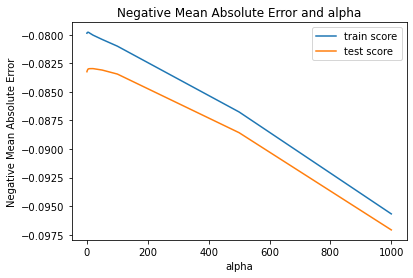

Optimum alpha for ridge is 20.000000
ridge  Regression with  20

R-squared value for train set :  0.9050330791393902
R-squared value for test set :  0.9291287227321047
RMSE value for train set :  0.11253251518022964
RMSE value for test set :  0.0976644636234026


In [42]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge_model, y_test_predicted = regularization_model(rfe_X_train, y_train, rfe_X_test, params, model='ridge')

### Lasso Regression

Fitting 15 folds for each of 27 candidates, totalling 405 fits


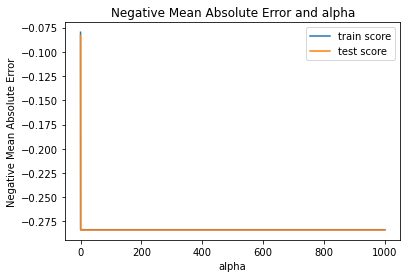

Optimum alpha for lasso is 0.000100
lasso  Regression with  0.0001

R-squared value for train set :  0.9065358192069646
R-squared value for test set :  0.9292472283346888
RMSE value for train set :  0.11163861736717866
RMSE value for test set :  0.09758277588747241


In [43]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso_model, y_test_predicted = regularization_model(rfe_X_train, y_train, rfe_X_test, params, model='lasso')

In [44]:
#Compare the Coefficients
coef= pd.DataFrame(index=rfe_X_test.columns)
coef.rows = rfe_X_test.columns
coef['Ridge (alpha=20.0)'] = ridge_model.coef_
coef['Lasso (alpha=0.0001)'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
coef

,Ridge (alpha=20.0),Lasso (alpha=0.0001)
LotArea,0.016810,0.015875
OverallQual,0.078685,0.078751
OverallCond,0.048258,0.048285
BsmtFinSF1,0.029392,0.029731
TotalBsmtSF,0.036897,0.037131
1stFlrSF,0.031649,-0.000147
2ndFlrSF,0.034517,-0.006321
GrLivArea,0.081713,0.127518
GarageCars,0.034757,0.034725
No_of_years_built,-0.059235,-0.062028


In [45]:
#Top 10 columns in Lasso Regression
coef[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False).head(10)

,Lasso (alpha=0.0001)
GrLivArea,0.127518
MSZoning_RL,0.117631
MSZoning_RM,0.081582
OverallQual,0.078751
MSZoning_FV,0.068624
OverallCond,0.048285
TotalBsmtSF,0.037131
GarageCars,0.034725
MSZoning_RH,0.032819
BsmtFinSF1,0.029731


In [46]:
#Top 10 columns in Ridge Regression
coef[['Ridge (alpha=20.0)']].sort_values(by='Ridge (alpha=20.0)', ascending=False).head(10)

,Ridge (alpha=20.0)
GrLivArea,0.081713
OverallQual,0.078685
MSZoning_RL,0.062597
OverallCond,0.048258
TotalBsmtSF,0.036897
MSZoning_FV,0.036691
GarageCars,0.034757
2ndFlrSF,0.034517
MSZoning_RM,0.033491
1stFlrSF,0.031649


As we observe the top 10 models in both Ridge and lasso are same. 

As we observe both Ridge and Lasso showing almost same r squared value. But with compared to train and test score Lasso seems to be the best choice.

The Mean Squared Error of Lasso slightly is less than that of Ridge. Also, since Lasso helps in feature reduction as the coefficient value of some of the features have become 0, Lasso has a better edge over Ridge.
Therefore, the variables predicted by Lasso can be applied to choose significant variables for predicting the price of a house.

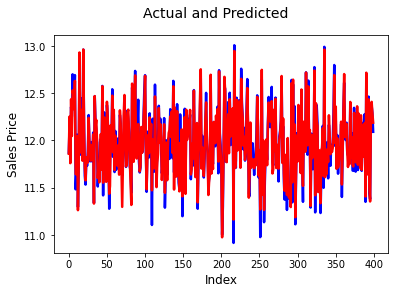

In [47]:
#Ridge Regression Actual vs Predicted 
a = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
ridge = Ridge(alpha=20)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
ridge_y_test_pred= ridge.predict(X_test)
plt.plot(a, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(a, ridge_y_test_pred, color="red", linewidth=2.5, linestyle="-")
plt.xlabel('Index', fontsize=12)                               
plt.ylabel('Sales Price', fontsize=12)  
fig.suptitle('Actual and Predicted', fontsize=14)  
plt.show()

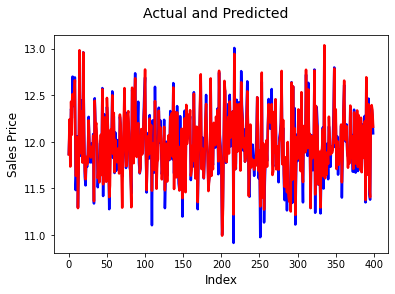

In [48]:
#Lasso Regression Actual vs Predicted
b= [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
lasso_y_test_pred= lasso.predict(X_test)
plt.plot(b, y_test, color="blue", linewidth=2.5,linestyle="-")
plt.plot(b, lasso_y_test_pred, color="red",linewidth=2.5,linestyle="-")             
plt.xlabel('Index', fontsize=12)                               
plt.ylabel('Sales Price', fontsize=12) 
fig.suptitle('Actual and Predicted', fontsize=14)  
plt.show()

----

## Conclusion

- The model accuracy on Train and Test set for both ridge and lasso models are similar, we need to choose the simpler model.
- Because the Simple Linear Regression model is quite sophisticated, we would not consider it.
- Ridge Regression model is complex, so we would not consider that.
- Optimum value of lambda for Ridge Regression is 20. Optimum value of lambda for Lasso Regression is 0.0001.
- Because the Lasso Regression model is simpler, we would choose it because the majority of co-efficients are zero.

Set of columns which influnce the most for Sales Pricing are:

1. GrLivArea	
2. OverallQual	
3. MSZoning_RL	
4. OverallCond	
5. TotalBsmtSF	
6. MSZoning_FV	
7. GarageCars	
8. 2ndFlrSF	
9. MSZoning_RM	
10. 1stFlrSF	

## END